<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Introduction to Infinite Processes

This notebook introduces two of the earliest known examples of mathematics motivated by the difficulty of representation.  Both $\sqrt{2}$ and $\pi$ are problematic numbers.  We can easily describe them geometrically, but when it comes to actually representing them with numbers in decimal form, the best we can do is approximate them.  


**GOALS**: 

- Use Babylonian Square Root Algorithm to approximate irrational numbers by hand.

- Use the Method of Exhaustion to approximate Pi

- Represent Zeno's Paradox of the Tortoise and Achilles.



### Computing Square Roots



Suppose we have a guess that we think is close to $\sqrt{2}$

$$x_1 \approx \sqrt{2} \quad \rightarrow \quad x_1 \times x_1 \approx 2 \quad \rightarrow \quad x_1 \approx \frac{2}{x_1}$$

Either $x_1$ is a better guess or $\frac{2}{x}$, but even better still would be the average of the two:

$$x_2 = \frac{1}{2} \big(x_1 + \frac{2}{x_1}\big)$$

If we continue in this manner we will get better and better approximations:

$$x_3 = \frac{1}{2} \big(x_2 + \frac{2}{x_2}\big)$$

$$x_4 = \frac{1}{2} \big(x_3 + \frac{2}{x_3}\big)$$

$$x_5 = \frac{1}{2} \big(x_4 + \frac{2}{x_4}\big)$$

$$\vdots$$

$$x_{n+1} = \frac{1}{2} \big(x_n + \frac{2}{x_n}\big)$$




### Problem 1: Using Approximation Formula

1. If you had to guess at a decimal value for $\sqrt{3}$ what would it be and why?  
2. Which is larger, your original guess or $\frac{3}{guess}$?
2. Use your initial guess as $x_0$ and compute $x_1$
3. Use your value for $x_1$ and compute $x_2$, $x_3$, and $x_4$.
4. Use a calculator to compute $\sqrt{3}$.  How close were each of your approximations?



# What is $\pi$?

In his book *The Historical Development of the Calculus*, C.H. Edwards relates an early history of $\pi$.  Around 430 BC, Hippocrates of Chios showed that the ratio of the area of two circles is equal to the ratio of the squares of their diameters.  Later, Eudoxus and Archimedes worked to deploy the method of exhaustion in determining this value.

### Rough Approximations

For Archimedes, he began with a hexagon inscribed and circumscribed on a circle with unit radius.  Of course, we've probably seen the relationship for the area of a circle as

$$A = \pi r^2$$

Thus, if we have $r = 1$, the area of our circle is equal to $\pi$.  We can use some rough approximations and our knowledge of square roots to determine a first approximation as Archimedes did by using a unit circle and inscribed and circumscribed hexagons as seen in the image below.

<img src = "images/exhaust.png" height="50%" width="50%" />


Here, we decompose the inscribed and circumscribed polygons using our knowledge of triangles.  As we saw in class, we can understand the inscribed triangles through the Pythagorean theorem, and some elementary knowledge about equilateral triangles.  To find the height of these triangles, we recognize that dropping a perpendicular to the base creates a right triangle with hypotenuse 1 and short leg $\frac{1}{2}$ shown below.

<img src = "images/triangle.png" height="50%" width="50%" />

Thus, we can find the height using the Pythagorean theorem.  This gives us:

$$\frac{1}{2}^2 + ?^2 = 1^2$$

$$?^2 = 1 - \frac{1}{4}$$

$$? = \frac{\sqrt{3}}{2}$$

and an area for each of the six triangles of 

$$A = \frac{1}{2}(\text{base})(\text{height}) \quad \text{or} \quad A = \frac{1}{2}\times 1\times\frac{\sqrt{3}}{2} = \frac{\sqrt{3}}{8}$$

Thus, for all six triangles we have

$$6 \times \frac{\sqrt{3}}{4} \quad \text{or} \quad \frac{3\sqrt{3}}{2}$$

We can use Python to compute this as a number using our tenth approximation for $\sqrt{3}$.



In [1]:
a = [1.6]

for i in range(9):
    a.append(0.5*(a[i]+3/a[i]))
    
print("The first approximation for pi is", (3*a[-1]/2))

The first approximation for pi is 2.598076211353316


### Problem II

Use the same approach to determine an overapproximation for $\pi$.

1. What is the area of a triangle in the circumscribed hexagon above?
2. What is the total area of the hexagon?
3. How good of an approximation for $\pi$ is this?
4. How could we arrive at a better approximation?

### Extra: Recurrence Relationships from Antiquity

While we could continue to determine the successive relationships as we go, there are actually patterns that develop in both Eudoxus who started with a square and Archimedes who began with a hexagon. As Bruce Shapiro notes in his book *Scientific Computation: Python Hacking for Math Junkies*, the Eudoxean relationship is contingent on the length of an outer edge of a polygon $H_n$ and the perimeter of that polygone $P_n$, as follows:


$$P_n = 2^n H_n \quad \text{thus} \quad \pi_n = \frac{1}{2}P_n = 2^{n-1}H_n$$

Further, we have a recursive relationship on $H_n$ as:

$$H_n^2 = 2 - 2\sqrt{1-\big(\frac{H_{n-1}}{2}\big)^2}$$

Thus, if we have an initial approximation, we can deploy this relationship to iterate and find better and better approximations.

For Archimedes, we have a similar relationship where $I_n$ is the inscribed polygon and $C_n$ is the circumscribed polygon, thus

$$I_n < \pi < C_n$$

and the recurrence relationships

$$C_{2n} = \frac{2C_nI_n}{C_n + I_n}$$

$$~$$

$$I_{2n} = \sqrt{C_{2n}I_{n}}$$

If you need something to do, you can establish these relationships.



### Zeno's Paradox

The philosopher Zeno of Elea is said to be the product of a series of paradoxical questions, one of which dealt with the difficulty in quantifying the continuum.  Here, the problem involved a race between a tortise and Achilles (a man).  The tortise got a head start.  Aristotle describes the problem in his Physics as follows:

>*"This claims that the slowest funner will never be caught by the fastest runner, because the one behind has first to reach the point from which the one in front started, and so the slower one is obound always to be in front" Aristotle"*, Physics 239b14 - 18

The problem, according to Zeno, has been interpreted to mean that it is impossible to cross any unit distance before crossing half of it.  It is impossible to cross this half without having crossed half of the half.  Continue the argument to infinity and how can we ever move?!  The image below offers a visualization of the problem.

![](images/zeno.png)






#### Zeno and Sums

If we examine the image above, it should make sense to us that the sum of the terms of Zeno's sequence add to one.  It may be counter intuitive to think that an infinite number of terms add to a finite number, however this is one of the fundamental problems for us.  What happens in the realm of the infinitely small?  

We can use our tools to investigate this.  First, let us create a sequence of Zeno's terms as follows.

$$\displaystyle \text{Zeno =} \quad [~ \frac{1}{2}, ~ \frac{1}{2^2}, ~ \frac{1}{2^3}, ...]$$


Now, we will create a sequence that provides the **partial sums** of the terms of Zeno as:

$$\displaystyle \text{Partial Sums = } ~ [\frac{1}{2}, ~ \frac{1}{2} + ~ \frac{1}{4}, ~ \frac{1}{2} + \frac{1}{4} + \frac{1}{16}, ...]$$


We will also plot these side by side to compare. 



In [8]:
zeno = [1/2**(i+1) for i in range(10)]
zeno

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625]

In [9]:
zeno_sums = [sum(zeno[:i]) for i in range(10)]

In [10]:
zeno_sums

[0,
 0.5,
 0.75,
 0.875,
 0.9375,
 0.96875,
 0.984375,
 0.9921875,
 0.99609375,
 0.998046875]

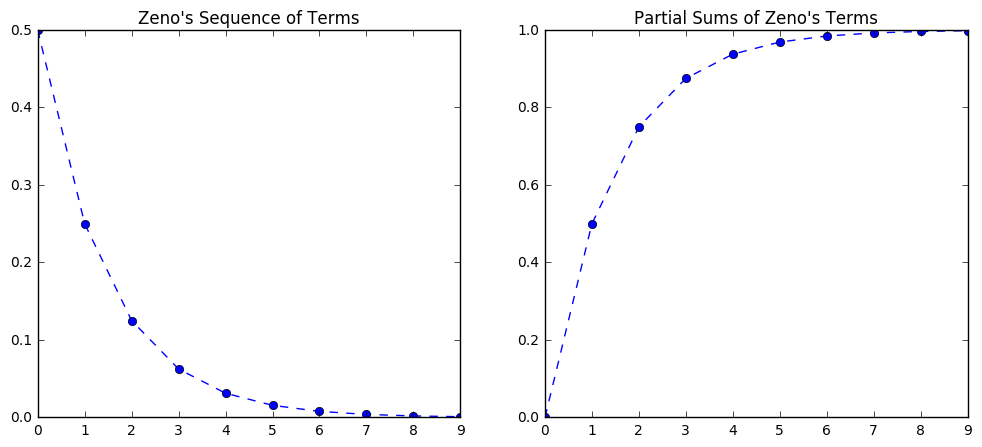

In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(zeno, '--o')
plt.title("Zeno's Sequence of Terms")

plt.subplot(1, 2, 2)
plt.plot(zeno_sums, '--o')
plt.title("Partial Sums of Zeno's Terms")

### The Quadrature of the Parabola

<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Parabolic_Segment_Dissection.svg/600px-Parabolic_Segment_Dissection.svg.png width = 50% />
    </center>
    
> "The Quadrature of the Parabola (Greek: Τετραγωνισμὸς παραβολῆς) is a treatise on geometry, written by Archimedes in the 3rd century BC. Written as a letter to his friend Dositheus, the work presents 24 propositions regarding parabolas, culminating in a proof that the area of a parabolic segment (the region enclosed by a parabola and a line) is 4/3 that of a certain inscribed triangle." -- [Wikipedia](https://en.wikipedia.org/wiki/The_Quadrature_of_the_Parabola)

Archimedes argued that if one knew the area of the original triangle, that subsequent triangles were related to this in that the sum of their areas were equal to $\frac{1}{4}$ the previously constructed one.

<center>
    <img src = images/arch_p2.png width = 30%/>
    </center>
    
In other words:

$$\frac{1}{4} A1 = A2$$

Here, we could write our approximation for the area under the parabola as 

$$area = A1 + A2$$
$$area = A1 + \frac{1}{4}A1$$



### Problem III: Approximating the Area under Parabola

1. Continue to use the ideas of Archimedes above to provide the next three terms of the sequence.  In the end, the goal is to have our approximation explicitly in terms of A1.
2. Factor your variable A1 out of your expression and compute the sum.
3. What is the value of the sum:
$$1 + \frac{1}{4} + \frac{1}{4}^2 + \frac{1}{4}^3 + ...$$
4. What does the image below have to do with this?

<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/GeometricSquares.svg/440px-GeometricSquares.svg.png width = 20%/>
    </center>

### Tossing a Coin

> Probability is a numerical description of how likely an event is to occur or how likely it is that a proposition is true. Probability is a number between 0 and 1, where, roughly speaking, 0 indicates impossibility and 1 indicates certainty.[note 1][1][2] The higher the probability of an event, the more likely it is that the event will occur. A simple example is the tossing of a fair (unbiased) coin. Since the coin is fair, the two outcomes ("heads" and "tails") are both equally probable; the probability of "heads" equals the probability of "tails"; and since no other outcomes are possible, the probability of either "heads" or "tails" is 1/2 (which could also be written as 0.5 or 50%). -- [Wikipedia](https://en.wikipedia.org/wiki/Probability)

Using this example, we will explore the probability of different outcomes for tossing two coins.  

1. Suppose you toss one coin, what is the probability you will get a head?
2. Suppose you toss two coins simultaneously.  How many ways are there for the following outcomes:
 - Two Heads
 - Two Tails
 - One Head and One Tail
 
3. Suppose you toss three coins simultaneously.  What are all the different possible outcomes?  What are their probabilities?

4. Toss 4 coins and answer the same question.

5.  Fill in the table below.

| coins | 0 Head | 1 Head | 2 Head | 3 Head | 4 Head | 5 Head | 6 Head |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
 | 0    |  1    |   na  |     na      |    na     |    na     |   na    |  na | 
 |  1    |   1   |     1 |    na |  na   |    na |    na |  na |
| 2   |        | |     |     |      |      |
| 3  |         | |     |     |     |     |
| 4 |         | |      |          |      |      |
| 5 |         | |      |       |         |         |
| 6 |         | |      |       |        |        |      |

In [26]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact



def binom_dist(n, p):
    
    fig, ax = plt.subplots(1, 1, figsize = (16, 5))
    mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
    x = np.arange(binom.ppf(0.01, n+1, p),
                  binom.ppf(0.99, n+1, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
    ax.set_title(f'Probabilities for {n} coin tosses\nCoin has probability {p} of landing Heads and {1 - p} for Tails', loc = 'left', fontsize = 20)
    ax.set_xlabel(f'Number of Heads')
    ax.set_ylabel('Probabilities')

interact(binom_dist, n = widgets.IntSlider(0, min = 0, max = 100, step = 1), p = widgets.FloatSlider(0.5, min = 0, max = 1, step = 0.1))

interactive(children=(IntSlider(value=0, description='n'), FloatSlider(value=0.5, description='p', max=1.0), O…

<function __main__.binom_dist(n, p)>